Netflix Movies and TV Shows

In [ ]:
import pandas as pd

# Load the Netflix titles dataset
netflix_titles = pd.read_csv('/netflix tv shows and movies.csv')

# Find the number of missing values in the release year column
num_missing = netflix_titles['release_year'].isna().sum()
print(f"Number of missing values in the release year column: {num_missing}")

# Fill missing values using mean
netflix_mean = netflix_titles['release_year'].mean(skipna=True)
netflix_titles['release_year'].fillna(netflix_mean, inplace=True)

# Fill missing values using median
netflix_median = netflix_titles['release_year'].median(skipna=True)
netflix_titles['release_year'].fillna(netflix_median, inplace=True)

# Fill missing values using mode
netflix_mode = netflix_titles['release_year'].mode()[0]
netflix_titles['release_year'].fillna(netflix_mode, inplace=True)


Number of missing values in the release year column: 10


In [ ]:
import pandas as pd

# Load the dataset
netflix_df = pd.read_csv("/netflix tv shows and movies.csv")



In [ ]:
import pandas as pd

# Load the dataset
netflix_df = pd.read_csv("/netflix tv shows and movies.csv")

# Check for missing values
print(netflix_df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year      10
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
import pandas as pd

# Load the Netflix titles dataset
netflix_titles = pd.read_csv('/netflix tv shows and movies.csv')

# Find the number of missing values in the duration column
num_missing = netflix_titles['duration'].isna().sum()
print(f"Number of missing values in the duration column: {num_missing}")

# Remove non-numeric characters from the duration column
netflix_titles['duration'] = netflix_titles['duration'].str.replace('\D', '')

# Convert the duration column to integers
netflix_titles['duration'] = pd.to_numeric(netflix_titles['duration'], errors='coerce')

# Fill missing values using mean
netflix_mean = netflix_titles['duration'].mean(skipna=True)
netflix_mean_filled = netflix_titles['duration'].fillna(netflix_mean)
print(f"Mean filled values:\n{netflix_mean_filled[netflix_titles['duration'].isna()]}")

# Fill missing values using median
netflix_median = netflix_titles['duration'].median(skipna=True)
netflix_median_filled = netflix_titles['duration'].fillna(netflix_median)
print(f"Median filled values:\n{netflix_median_filled[netflix_titles['duration'].isna()]}")

# Fill missing values using mode
netflix_mode = netflix_titles['duration'].mode()[0]
netflix_mode_filled = netflix_titles['duration'].fillna(netflix_mode)
print(f"Mode filled values:\n{netflix_mode_filled[netflix_titles['duration'].isna()]}")


Number of missing values in the duration column: 3
Mean filled values:
5541    69.846888
5794    69.846888
5813    69.846888
Name: duration, dtype: float64
Median filled values:
5541    88.0
5794    88.0
5813    88.0
Name: duration, dtype: float64
Mode filled values:
5541    1.0
5794    1.0
5813    1.0
Name: duration, dtype: float64


<ipython-input-2-7fccb04a4509>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  netflix_titles['duration'] = netflix_titles['duration'].str.replace('\D', '')


In [ ]:
import pandas as pd

# Load the Netflix titles dataset
netflix_titles = pd.read_csv('/netflix tv shows and movies.csv')

# Find the number of missing values in the release year column
num_missing = netflix_titles['release_year'].isna().sum()
print(f"Number of missing values in the release year column: {num_missing}")

# Fill missing values using mean
netflix_mean = netflix_titles['release_year'].mean(skipna=True)
netflix_titles['release_year'].fillna(netflix_mean, inplace=True)
netflix_mean_filled = netflix_titles['release_year'][netflix_titles['release_year'].isna()].fillna(netflix_mean)
print(f"Mean filled values:\n{netflix_mean_filled}")

# Fill missing values using median
netflix_median = netflix_titles['release_year'].median(skipna=True)
netflix_titles['release_year'].fillna(netflix_median, inplace=True)
netflix_median_filled = netflix_titles['release_year'][netflix_titles['release_year'].isna()].fillna(netflix_median)
print(f"Median filled values:\n{netflix_median_filled}")

# Fill missing values using mode
netflix_mode = netflix_titles['release_year'].mode()[0]
netflix_titles['release_year'].fillna(netflix_mode, inplace=True)
netflix_mode_filled = netflix_titles['release_year'][netflix_titles['release_year'].isna()].fillna(netflix_mode)
print(f"Mode filled values:\n{netflix_mode_filled}")


Number of missing values in the release year column: 10
Mean filled values:
Series([], Name: release_year, dtype: float64)
Median filled values:
Series([], Name: release_year, dtype: float64)
Mode filled values:
Series([], Name: release_year, dtype: float64)


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Load the Netflix titles dataset into a Pandas DataFrame
df = pd.read_csv('/netflix tv shows and movies.csv')

# Identify the missing values in the dataset
missing_data = df.isnull()

# Split the dataset into two parts: one with missing values and the other with no missing values
no_missing_data = df.dropna()
missing_data = df[missing_data.any(axis=1)]

# Use the dataset with no missing values as the training set
X_train = no_missing_data.drop('show_id', axis=1)
y_train = no_missing_data['show_id']

# Perform one-hot encoding on the training set
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

# Use the KNN imputer to impute the missing values in the dataset with missing values using the training set
imputer = KNNImputer(n_neighbors=5)
missing_data_encoded = encoder.transform(missing_data.drop('show_id', axis=1))
imputed_data_encoded = imputer.fit_transform(missing_data_encoded.toarray()) # Convert to dense matrix
imputed_data = pd.DataFrame(encoder.inverse_transform(imputed_data_encoded))

# Combine the two datasets into a single dataset with imputed values
imputed_data.insert(0, 'show_id', missing_data['show_id'].values)
imputed_data.columns = df.columns

df_imputed = pd.concat([no_missing_data, imputed_data])

# Save the imputed dataset to a new CSV file
df_imputed.to_csv('netflix_titles_imputed.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
netflix_data = pd.read_csv('/netflix tv shows and movies.csv')

# Select the numerical features for clustering
numeric_cols = ['release_year']
numeric_data = netflix_data[numeric_cols]

# Replace missing values with the mean of the respective column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

# Print the cluster centers and the count of movies in each cluster
print(kmeans.cluster_centers_)
print(pd.Series(kmeans.labels_).value_counts())


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.43696582]
 [-2.02863498]
 [-4.84990888]
 [-0.40595404]]
0    6208
3    1880
1     545
2     174
dtype: int64


In [ ]:
!pip install fancyimpute # Install the library

import pandas as pd
from fancyimpute import KNN

# Load the dataset
netflix_df = pd.read_csv("/netflix tv shows and movies.csv")

# Exclude non-numeric columns
numeric_cols = netflix_df.select_dtypes(include=[float, int]).columns.tolist()
netflix_numeric = netflix_df[numeric_cols]

# Perform KNN imputation
netflix_imputed = KNN(k=5).fit_transform(netflix_numeric)

# Convert the imputed array back to a dataframe
netflix_imputed_df = pd.DataFrame(netflix_imputed, columns=numeric_cols)

# Combine the imputed data with the non-numeric columns
non_numeric_cols = netflix_df.select_dtypes(exclude=[float, int]).columns.tolist()
netflix_imputed_df[non_numeric_cols] = netflix_df[non_numeric_cols]

# Check for missing values in the imputed dataframe
print(netflix_imputed_df.isnull().sum())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Imputing row 1/8807 with 0 missing, elapsed time: 6.814
Imputing row 101/8807 with 0 missing, elapsed time: 6.815
Imputing row 201/8807 with 0 missing, elapsed time: 6.815
Imputing row 301/8807 with 0 missing, elapsed time: 6.816
Imputing row 401/8807 with 0 missing, elapsed time: 6.816
Imputing row 501/8807 with 0 missing, elapsed time: 6.817
Imputing row 601/8807 with 0 missing, elapsed time: 6.817
Imputing row 701/8807 with 0 missing, elapsed time: 6.818
Imputing row 801/8807 with 0 missing, elapsed time: 6.819
Imputing row 901/8807 with 0 missing, elapsed time: 6.819
Imputing row 1001/8807 with 0 missing, elapsed time: 6.820
Imputing row 1101/8807 with 0 missing, elapsed time: 6.820
Imputing row 1201/8807 with 0 missing, elapsed time: 6.821
Imputing row 1301/8807 with 0 missing, elapsed time: 6.821
Imputing row 1401/8807 with 0 missing, elapsed time: 6.822
Imputing row 1501/8807 with 

In [ ]:
print(netflix_imputed_df.head())


   show_id  type   title  director    cast  country  date_added  release_year  \
0      0.0   0.0  1973.0    2295.0  7677.0    603.0      1711.0        2020.0   
1   1111.0   1.0  1089.0    4516.0   409.0    426.0      1706.0        2021.0   
2   2222.0   1.0  2648.0    2105.0  6296.0    748.0      1706.0        2021.0   
3   3333.0   1.0  3503.0    4516.0  7677.0    748.0      1706.0        2021.0   
4   4444.0   1.0  3858.0    4516.0  4815.0    251.0      1706.0        2021.0   

   rating  duration  listed_in  description  
0     7.0     210.0      274.0       2577.0  
1    11.0     110.0      414.0       1762.0  
2    11.0       0.0      242.0       7341.0  
3    11.0       0.0      297.0       3617.0  
4    11.0     110.0      393.0       4416.0  


In [ ]:
!pip install fancyimpute # Install the library

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN

# Load the dataset
netflix_df = pd.read_csv("/netflix tv shows and movies.csv")

# Convert categorical variables to numerical
cat_cols = netflix_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    netflix_df[col] = LabelEncoder().fit_transform(netflix_df[col].astype(str))

# Perform KNN imputation on all columns
netflix_imputed = KNN(k=5).fit_transform(netflix_df)

# Convert the imputed array back to a dataframe
netflix_imputed_df = pd.DataFrame(netflix_imputed, columns=netflix_df.columns)

# Check for missing values in the imputed dataframe
print(netflix_imputed_df.isnull().sum())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Imputing row 1/8807 with 0 missing, elapsed time: 14.376
Imputing row 101/8807 with 0 missing, elapsed time: 14.378
Imputing row 201/8807 with 0 missing, elapsed time: 14.379
Imputing row 301/8807 with 0 missing, elapsed time: 14.380
Imputing row 401/8807 with 0 missing, elapsed time: 14.381
Imputing row 501/8807 with 0 missing, elapsed time: 14.381
Imputing row 601/8807 with 0 missing, elapsed time: 14.383
Imputing row 701/8807 with 0 missing, elapsed time: 14.383
Imputing row 801/8807 with 0 missing, elapsed time: 14.383
Imputing row 901/8807 with 0 missing, elapsed time: 14.384
Imputing row 1001/8807 with 0 missing, elapsed time: 14.384
Imputing row 1101/8807 with 0 missing, elapsed time: 14.384
Imputing row 1201/8807 with 0 missing, elapsed time: 14.384
Imputing row 1301/8807 with 0 missing, elapsed time: 14.385
Imputing row 1401/8807 with 0 missing, elapsed time: 14.385
Imputing row 

In [ ]:
print(netflix_imputed_df)


      show_id  type   title  director    cast  country  date_added  \
0         0.0   0.0  1973.0    2295.0  7677.0    603.0      1711.0   
1      1111.0   1.0  1089.0    4516.0   409.0    426.0      1706.0   
2      2222.0   1.0  2648.0    2105.0  6296.0    748.0      1706.0   
3      3333.0   1.0  3503.0    4516.0  7677.0    748.0      1706.0   
4      4444.0   1.0  3858.0    4516.0  4815.0    251.0      1706.0   
...       ...   ...     ...       ...     ...      ...         ...   
8802   8671.0   0.0  8767.0     979.0  4677.0    603.0      1419.0   
8803   8672.0   1.0  8770.0    4516.0  7677.0    748.0       788.0   
8804   8673.0   0.0  8771.0    3631.0  3231.0    603.0      1366.0   
8805   8674.0   0.0  8774.0    3247.0  7061.0    603.0       665.0   
8806   8675.0   0.0  8778.0    2926.0  7297.0    251.0      1127.0   

      release_year  rating  duration  listed_in  description  
0           2020.0     7.0     210.0      274.0       2577.0  
1           2021.0    11.0     11

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


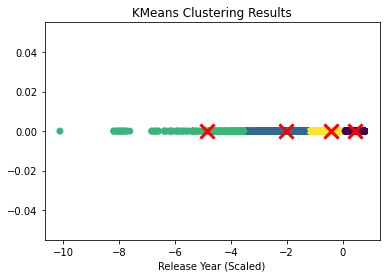

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
netflix_data = pd.read_csv('/netflix tv shows and movies.csv')

# Select the numerical features for clustering
numeric_cols = ['release_year']
numeric_data = netflix_data[numeric_cols]

# Replace missing values with the mean of the respective column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

# Plot the results
plt.scatter(scaled_data[:, 0], [0] * len(scaled_data), c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * len(kmeans.cluster_centers_), marker='x', s=200, linewidths=3, color='r')
plt.title('KMeans Clustering Results')
plt.xlabel('Release Year (Scaled)')
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


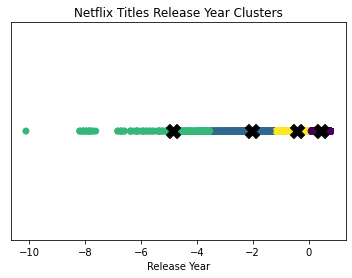

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
netflix_data = pd.read_csv('/netflix tv shows and movies.csv')

# Select the numerical features for clustering
numeric_cols = ['release_year']
numeric_data = netflix_data[numeric_cols]

# Replace missing values with the mean of the respective column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

# Plot the clusters
plt.scatter(scaled_data[:, 0], [0] * len(scaled_data), c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * len(kmeans.cluster_centers_), s=200, marker='X', c='black')
plt.title('Netflix Titles Release Year Clusters')
plt.xlabel('Release Year')
plt.yticks([])
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


 0    8791
 1      15
-1       1
dtype: int64


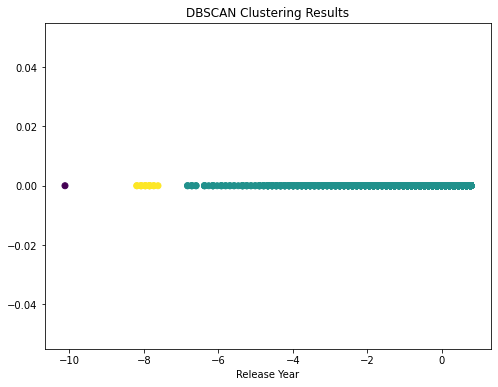

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
netflix_data = pd.read_csv('/netflix tv shows and movies.csv')

# Select the numerical features for clustering
numeric_cols = ['release_year']
numeric_data = netflix_data[numeric_cols]

# Replace missing values with the mean of the respective column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(scaled_data)

# Print the count of movies in each cluster
print(pd.Series(dbscan.labels_).value_counts())

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], np.zeros_like(scaled_data[:, 0]), c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Release Year')
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


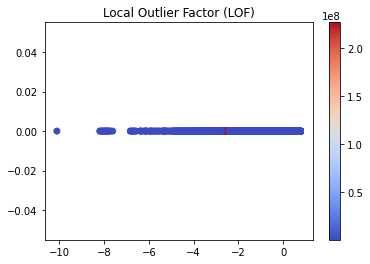

In [ ]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Load the data into a pandas dataframe
netflix_data = pd.read_csv('/netflix tv shows and movies.csv')

# Select the numerical features for clustering
numeric_cols = ['release_year']
numeric_data = netflix_data[numeric_cols]

# Replace missing values with the mean of the respective column
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform Local Outlier Factor (LOF) detection
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
outlier_scores = lof.fit_predict(scaled_data)

# Plot the data points with colors representing their LOF scores
plt.scatter(scaled_data[:, 0], [0] * len(scaled_data), c=-lof.negative_outlier_factor_, cmap='coolwarm')
plt.colorbar()
plt.title("Local Outlier Factor (LOF)")
plt.show()
